# BEAMSETI Functionality & Workflow Tutorial

Written by Matti Weiss

This notebook demonstrates the four core BEAMSETI data processing functions and two visualization
functions for SETI survey analysis, based on empirical and statistical catalog approaches.

Below is a flowchart describing the methodology of the 4 key pipelines and 2 subsequent plotting functions

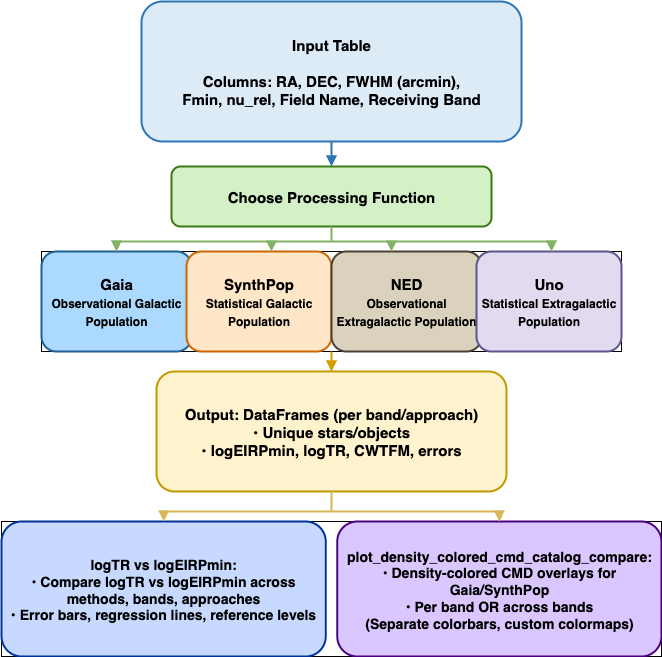

# Prerequisites & Imports

Instructions for installation and setup (see README)

Import core functions:

In [1]:
from beamseti import process_gaia, process_synthpop, process_ned, process_uno
from beamseti.plotting import plot_logTR_vs_logEIRPmin, plot_density_colored_cmd_catalog_compare
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import numpy as np

# Calling each function

## Empirical Galactic Pipeline: process_gaia
(see docstring for specifics of inputs/outputs, notes, and references)

In [8]:
gaia_df = pd.read_csv('data.csv')
stars_gaia_dict, shell_results_gaia_dict = process_gaia(gaia_df, split_by_band=True)
stars_gaia['band1']...  # Each band dataframe can be accessed like this
shell_results_gaia_dict['band1']...

SyntaxError: invalid syntax (1311508269.py, line 3)

## Statistical Galactic Pipeline: process_synthpop
(see docstring for specifics of inputs/outputs, notes, and references)

In [ ]:
synthpop_df = pd.read_csv('data.csv')
stars_synthpop_dict, shell_results_synthpop_dict = process_synthpop(synthpop_df, limit_distance_pc=25000, split_by_band=True)
stars_synthpop_dict['band1']...   
shell_results_synthpop['band1']...

## Empirical Extragalactic Pipeline: process_ned
(see docstring for specifics of inputs/outputs, notes, and references)

In [ ]:
ned_df = pd.read_csv('data.csv')
galaxies_ned_dict, type_counts_ned_dict, summary_ned_dict, shell_results_ned_dict = process_ned(ned_df, split_by_band=True)
galaxies_ned_dict['band1']...
type_counts_ned_dict['band1']...
summary_ned_dict['band1']...
shell_results_ned_dict['band1']...

## Statistical Extragalactic Pipeline: process_uno
(see docstring for specifics of inputs/outputs, notes, and references)

In [ ]:
uno_df = pd.read_csv('data.csv')
uno_summary_dict = process_uno(
    uno_df,
    log_rho_dict={'lower': 8.443, 'nominal': 8.473, 'upper': 8.653},
    split_by_band=True,
    verbose=True
)
uno_summary_dict['band1']...

## Comparative Visualization: plot_logTR_vs_logEIRPmin
(see docstring for specifics of inputs/outputs, notes, and references)

In [ ]:
fig_tr = plot_logTR_vs_logEIRPmin(
    {'Gaia': {'band1': shell_results_gaia_dict['band1'], ...}, 'SynthPop': {'band1': shell_results_synthpop['band1'], ...}},
)
# Show plot: fig_tr[0]

## Comparative Visualization: plot_density_colored_cmd_catalog_compare
(see docstring for specifics of inputs/outputs, notes, and references) 

In [ ]:
fig_cmd = plot_density_colored_cmd_catalog_compare(
    {'Gaia': {'band1': stars_gaia['band1'], ...}, 'SynthPop': {'band1': stars_synthpop_dict['band1'], ...}},
)
# Show plot: fig_cmd[0]

# Example Inputs, Outputs and Figures

## process_gaia - Galactic Analysis
Let's start with a dataframe with all required columns (see README and docstrings) that based on 3 fields with different receiving bands from the Price et al. (2020) catalog, and Uno et al. (2023) values for dlim.

In [2]:
from beamseti import process_gaia, process_synthpop, process_ned, process_uno
from beamseti.plotting import plot_logTR_vs_logEIRPmin, plot_density_colored_cmd_catalog_compare
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import numpy as np

In [3]:
df_price = pd.read_csv('df_price.csv')

In [ ]:
df_price

Now I am going to run the function, querying Gaia results within each unique band's FWHM, out to a maximum distance of 10 kpc, using a custom range of EIRPmin shells from 10^10 to 10^18 W, with integer log spacing.

In [5]:
gaia_stars, gaia_shells = process_gaia(
    dataframe=df_price,
    limit_distance_pc=10000,
    output_prefix=None,
    batch_size=200,
    max_workers=100,
    sleep_between_batches=1,
    n_shells=None,
    log_eirp_shells=np.linspace(10, 18, 9),
    split_by_band=True
)

INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]


Now to access each band's dataframe, set each dictionary key to the appropriate band name

In [6]:
df_price['receiving_band'].unique()

array(['Parkes 10-cm', 'GBT L-band', 'GBT S-band'], dtype=object)

In [7]:
gaia_stars_gbtl = gaia_stars['GBT L-band']
gaia_stars_gbtl

,field_name,source_id,ra,dec,r_med_geo,r_lo_geo,r_hi_geo,r_med_photogeo,r_lo_photogeo,r_hi_photogeo,...,abs_g_geo,abs_g_photogeo,theta_arcmin,scaling_factor,fmin,nu_rel,fwhm_arcmin,logEIRPmin_med,logEIRPmin_lo,logEIRPmin_hi
0,HIP43790,577597544250354688,133.776446,1.475620,850.577454,507.608093,1553.729004,4645.317871,4042.508301,5493.516113,...,11.160600,7.474093,3.996502,0.533868,1.000000e-25,0.533333,8.4,15.209994,14.761626,15.733317
1,HIP43790,577597548543173760,133.777170,1.476679,2363.680664,1652.442505,3528.458740,2069.404053,1812.323975,2267.326172,...,6.602191,6.890908,3.929795,0.545076,1.000000e-25,0.533333,8.4,16.088724,15.777795,16.436716
2,HIP43790,577597582902208128,133.763085,1.477240,3314.388672,1906.421875,6286.182129,1852.944458,1592.907349,2075.383789,...,7.009595,8.272300,4.047073,0.525403,1.000000e-25,0.533333,8.4,16.398317,15.917948,16.954283
3,HIP43790,577597582902350592,133.756735,1.477241,1637.364258,942.732056,2962.506348,4936.453125,4071.104248,5642.118164,...,9.778492,7.382143,4.169588,0.505026,1.000000e-25,0.533333,8.4,15.802978,15.323463,16.318008
4,HIP43790,577598952997491712,133.824921,1.488560,1093.609985,998.158936,1285.590820,1009.511169,938.000854,1080.235596,...,6.976016,7.149772,4.113866,0.514269,1.000000e-25,0.533333,8.4,15.444538,15.365211,15.585018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182507,HIP94779,2139711342038268160,289.193213,53.408908,3882.428955,2671.020752,6211.226562,2228.399902,1985.396484,2451.488037,...,6.926669,8.132221,3.813144,0.564769,1.000000e-25,0.533333,8.4,16.504337,16.179485,16.912486
182508,HIP94779,2139711342038278912,289.200964,53.416315,3248.807129,2479.317871,4541.679688,3162.335449,2768.398682,3636.219971,...,6.208272,6.266852,3.911076,0.548229,1.000000e-25,0.533333,8.4,16.362487,16.127704,16.653472
182509,HIP94779,2139711342040664832,289.197543,53.415406,4453.253906,2785.101562,7944.851074,4489.341797,3944.262695,5118.690430,...,5.945148,5.927622,3.957684,0.540385,1.000000e-25,0.533333,8.4,16.642652,16.234980,17.145471
182510,HIP94779,2139711372104491904,289.200385,53.421286,515.179565,473.957214,557.448242,531.054932,485.679443,587.063293,...,10.361451,10.295546,4.146123,0.508913,1.000000e-25,0.533333,8.4,14.795276,14.722835,14.863765


This shows the 181,768 stars located within 10 kpc, and within the 8.4 arcmin FWHM for the GBT-L band receiver


Similarly, to access the shell results dataframe for GBT-L:

In [8]:
gaia_shells_gbtl = gaia_shells['GBT L-band']
gaia_shells_gbtl

,log_EIRPmin_shell,n_stars,n_stars_pos_err,n_stars_neg_err,log_TR,log_TR_pos_err,log_TR_neg_err,CWTFM,CWTFM_pos_err,CWTFM_neg_err,max_distance_pc
0,10.0,1,0,0,0.273001,0.000000,0.000000,0.937500,0.000000,0.000000,2.890674
1,11.0,47,0,0,-1.399097,0.000000,0.000000,0.199468,0.000000,0.000000,9.141114
2,12.0,587,0,1,-2.495637,0.000740,0.000000,0.159710,0.000273,0.000000,28.906742
3,13.0,730,3,0,-2.590322,0.000000,0.001781,1.284247,0.000000,0.005256,91.411144
4,14.0,1445,205,101,-2.886867,0.031469,0.057616,6.487889,0.487557,0.806071,289.067420
5,15.0,10700,6683,2551,-3.756383,0.118279,0.210741,8.761682,2.742797,3.368482,914.111445
6,16.0,60834,51233,22590,-4.511145,0.201583,0.265331,15.410790,9.102859,7.045259,2890.674200
7,17.0,178567,3102,33214,-4.978800,0.089377,0.007480,52.501302,11.996851,0.896460,9141.114445
8,18.0,181768,0,6,-4.986516,0.000014,0.000000,515.767352,0.017026,0.000000,28906.741999


## process_synthpop
Now let's use the same dataframe with all required columns, but for a synthetic analysis of the same bands and fields, out to 10 kpc as well, with the same shell spacing

In [ ]:
synthpop_stars, synthpop_shells = process_synthpop(
    dataframe=df_price,
    limit_distance_pc=10000,
    output_prefix=None,
    batch_size=5,
    max_workers=5,
    sleep_between_batches=1,
    n_shells=None,
    log_eirp_shells=np.linspace(10, 18, 9),
    config_file='huston2025_defaults.synthpop_conf',
    split_by_band=True
)

 134333 - Execution Date: 17-08-2025 22:35:40


################################ Settings #################################
 134336 - # reading default parameters from
 134337 - default_config_file =  /Users/MattLor/synthpop/synthpop/config_files/_default.synthpop_conf 
 134339 - # read configuration from 
 134340 - config_file = '/Users/MattLor/synthpop/synthpop/config_files/huston2025_defaults.synthpop_conf' 


# copy the following to a config file to redo this model generation -------
 134344 - {
    "l_set": null,
    "l_set_type": null,
    "b_set": null,
    "b_set_type": null,
    "name_for_output": "mod2test",
    "model_name": "Huston2025",
    "solid_angle": null,
    "solid_angle_unit": "deg^2",
    "random_seed": 347872101,
    "sun": {
        "x": -8.178,
        "y": 0.0,
        "z": 0.017,
        "u": 12.9,
        "v": 245.6,
        "w": 7.78,
        "l_apex_deg": 56.24,
        "b_apex_deg": 22.54
    },
    "lsr": {
        "u_lsr": 1.8,
        "v_lsr": 233.4,
 

And accessing GBT-L stars and shells:

In [58]:
synthpop_stars_gbtl = synthpop_stars['GBT L-band']
synthpop_stars_gbtl

,field_name,pop,iMass,age,Fe/H_initial,Mass,In_Final_Phase,Dist,ra,dec,...,Gaia_BP_EDR3,Gaia_RP_EDR3,Dim_Compact_Object_Flag,Dist_pc,theta_arcmin,scaling_factor_percent,fmin,nu_rel,fwhm_arcmin,logEIRPmin
0,GJ860B,1.0,0.082673,14.000000,-2.096138,0.082673,0.0,1.980692,337.118925,57.681913,...,NaN,NaN,0.0,1980.692128,4.125536,51.232988,1.000000e-25,0.533333,8.4,15.962086
1,GJ860B,1.0,0.413374,14.000000,-1.845181,0.413353,0.0,2.699548,336.999725,57.720083,...,25.987790,22.391972,0.0,2699.548209,1.579340,90.663830,1.000000e-25,0.533333,8.4,15.983150
2,GJ860B,1.0,0.149169,14.000000,-2.191290,0.149166,0.0,4.396249,337.072631,57.670845,...,30.453184,26.192751,0.0,4396.249263,2.928749,71.387483,1.000000e-25,0.533333,8.4,16.510544
3,GJ860B,1.0,0.170885,14.000000,-1.196236,0.170881,0.0,4.511921,336.965673,57.676319,...,30.700015,26.237905,0.0,4511.920899,1.365004,92.940187,1.000000e-25,0.533333,8.4,16.418521
4,GJ860B,1.0,0.465188,14.000000,-1.322895,0.465158,0.0,4.649175,337.054967,57.671399,...,27.707595,23.707523,0.0,4649.175402,2.426451,79.346156,1.000000e-25,0.533333,8.4,16.513228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004337,HIP99711,10.0,1.158997,9.058798,-0.621264,0.520331,1.0,4.995745,303.507565,-0.822787,...,NaN,NaN,1.0,4995.744952,2.627909,76.234123,1.000000e-25,0.533333,8.4,16.593053
1004338,HIP99711,10.0,0.416821,7.540568,-0.558564,0.416812,0.0,5.035163,303.474094,-0.884893,...,24.829313,22.405685,0.0,5035.163137,1.888505,86.923619,1.000000e-25,0.533333,8.4,16.542891
1004339,HIP99711,10.0,0.613520,9.578914,-0.306460,0.613476,0.0,5.171779,303.514726,-0.889302,...,22.866310,20.836039,0.0,5171.779432,1.695855,89.314461,1.000000e-25,0.533333,8.4,16.554360
1004340,HIP99711,10.0,0.167888,7.154721,-0.582838,0.167886,0.0,5.314352,303.438788,-0.874278,...,27.339587,24.637287,0.0,5314.351994,3.653444,59.186106,1.000000e-25,0.533333,8.4,16.756683


For the same field and limiting distance, SynthPop returns 104 stars.

And for shells:

In [59]:
synthpop_shells_gbtl = synthpop_shells['GBT L-band']
synthpop_shells_gbtl

,log_EIRPmin_shell,n_stars,n_stars_err,log_TR,log_TR_err,CWTFM,CWTFM_err,max_distance_pc
0,10.0,0,0.000000,NaN,NaN,NaN,NaN,NaN
1,11.0,0,0.000000,NaN,NaN,NaN,NaN,NaN
2,12.0,0,0.000000,NaN,NaN,NaN,NaN,NaN
3,13.0,1,1.000000,0.273001,0.273001,937.500000,937.500000,91.411144
4,14.0,67,8.185353,-1.553074,0.189738,139.925373,17.094605,289.067420
5,15.0,1751,41.844952,-2.970285,0.070983,53.540834,1.279505,914.111445
6,16.0,32673,180.756743,-4.241188,0.023464,28.693417,0.158741,2890.674200
7,17.0,689940,830.626270,-5.565810,0.006701,13.588138,0.016359,9141.114445
8,18.0,1004342,1002.168648,-5.728880,0.005716,93.344697,0.093143,28906.741999


## process_ned - Extragalactic analysis

Now for extragalactic analysis of the same fields, I am going to use the NED query for observational analysis of all objects within 500 Mpc, setting the Hubble constant to 70 km/s/Mpc, using the median of all redshift independent distances, and using EIRPmin shells from 10^24 to 10^27 W, with integer log spacing per unique band. Using no shells returns shell spacing based on each unique EIRPmin value for all objects with distances. Let's call the function and assign the return variable dictionaries:

In [60]:
ned_objects, ned_types, ned_summaries, ned_shell_results = process_ned(
    dataframe=df_price,
    limit_distance_mpc=1000,
    output_prefix=None,
    batch_size=500,
    max_workers=100,
    sleep_between_batches=2,
    H0=70.0,
    ri_method='median',
    split_by_band=True,
    n_shells=None,
    log_eirp_shells=np.linspace(24, 27, 4)
)

Processing receiving_band=Parkes 10-cm with 168 fields.
Processing receiving_band=GBT L-band with 834 fields.
Processing receiving_band=GBT S-band with 709 fields.


To see all objects, (with or without valid redshifts/distances) access the ned_objects dictionary:

In [61]:
ned_objects_gbtl = ned_objects['GBT L-band']
ned_objects_gbtl

,field_name,No.,Object Name,ra,dec,Type,Velocity,Redshift,Redshift Flag,Magnitude and Filter,...,Photometry Points,Positions,Redshift Points,Diameter Points,Associations,fmin,nu_rel,fwhm_arcmin,theta_arcmin,scaling_factor
0,HIP54677,1,WISEA J111124.24-145846.6,167.85103,-14.97964,IrS,NaN,NaN,,,...,12,1,0,0,0,1.000000e-25,0.533333,5.5,2.482052,56.855723
1,HIP54677,2,WISEA J111124.76-145813.7,167.85317,-14.97050,IrS,NaN,NaN,,,...,12,1,0,0,0,1.000000e-25,0.533333,5.5,2.615498,53.419109
2,HIP54677,3,WISEA J111125.00-145917.8,167.85419,-14.98830,IrS,NaN,NaN,,,...,12,1,0,0,0,1.000000e-25,0.533333,5.5,2.172256,64.888739
3,HIP54677,4,WISEA J111125.13-150107.0,167.85474,-15.01863,IrS,NaN,NaN,,,...,12,1,0,0,0,1.000000e-25,0.533333,5.5,2.580785,54.309595
4,HIP54677,5,WISEA J111125.78-150122.9,167.85746,-15.02304,IrS,NaN,NaN,,,...,12,1,0,0,0,1.000000e-25,0.533333,5.5,2.621557,53.263967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198025,HIP54651,147,WISEA J111125.43-105725.3,167.85596,-10.95704,IrS,NaN,NaN,,,...,12,1,0,0,0,1.000000e-25,0.533333,8.4,3.893967,55.111330
198026,HIP54651,148,WISEA J111125.74-105746.4,167.85732,-10.96292,UvS,NaN,NaN,,,...,22,3,0,0,0,1.000000e-25,0.533333,8.4,4.034900,52.743810
198027,HIP54651,149,WISEA J111125.84-105641.4,167.85770,-10.94484,IrS,NaN,NaN,,,...,12,1,0,0,0,1.000000e-25,0.533333,8.4,3.966892,53.883791
198028,HIP54651,150,WISEA J111125.94-105707.4,167.85809,-10.95208,IrS,NaN,NaN,,,...,12,1,0,0,0,1.000000e-25,0.533333,8.4,3.990610,53.485654


There are 369 extragalactic objects (Infrared sources, galaxies, galaxy clusters, etc...) within 500 Mpc for the single GBT-L field

To access the types and counts for these objects:

In [62]:
ned_types_gbtl = ned_types['GBT L-band']
ned_types_gbtl

,Type,Count
0,!*,175
1,!**,1
2,!V*,74
3,*,15026
4,AbLS,10
5,Blue*,3
6,G,20409
7,GClstr,47
8,GGroup,25
9,GPair,7


To access a summary of each unique object with valid distances:

In [63]:
ned_summaries_gbtl = ned_summaries['GBT L-band']
ned_summaries_gbtl

,field_name,object_name,type,distance_mpc,offset_arcmin,beam_response_percent,nu_rel,N_stars,log_Nstars,log_Nstars_err,log_EIRPmin,log_TR,log_TR_err,CWTFM
0,HIP71181,Mr19:[BFW2006] 20354,GGroup,199.790260,3.819588,56.367870,0.533333,1.000000e+11,11.0,0.3,25.928119,-10.726999,0.3,79449.283478
1,HIP68030,2MASX J13555811+1403417,G,174.012391,2.072546,67.455443,0.533333,1.000000e+11,11.0,0.3,25.730145,-10.726999,0.3,50363.550043
2,HIP70497,SDSS J142456.92+515318.5,G,347.108273,3.257552,65.903762,0.533333,1.000000e+11,11.0,0.3,26.340021,-10.726999,0.3,205112.773054
3,GJ1111,WISEA J082951.87+264541.9,G,339.986061,1.104727,95.317638,0.533333,1.000000e+11,11.0,0.3,26.161751,-10.726999,0.3,136057.327332
4,HIP78459,WISEA J160107.02+331452.1,G,386.111272,3.286506,65.414908,0.533333,1.000000e+11,11.0,0.3,26.435750,-10.726999,0.3,255694.396997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,HIP83043,WISEA J165814.39+254658.2,G,403.220856,2.764818,74.054238,0.533333,1.000000e+11,11.0,0.3,26.419538,-10.726999,0.3,246325.312738
234,HIP105341,WISEA J211958.17-194917.9,G,175.164450,4.159931,50.662476,0.533333,1.000000e+11,11.0,0.3,25.860207,-10.726999,0.3,67948.287433
235,HIP56242,WISEA J113144.46+142326.4,G,349.121166,1.619379,78.634685,0.533333,1.000000e+11,11.0,0.3,26.268340,-10.726999,0.3,173904.649080
236,HIP69483,DESI J213.4043+51.8491,G,324.439681,3.760213,57.373563,0.533333,1.000000e+11,11.0,0.3,26.341558,-10.726999,0.3,205839.677882


For this 1 field, NED queried 0 objects with valid distance. 

And to access the shell results for this 1 field: 

In [64]:
ned_shell_results_gbtl = ned_shell_results['GBT L-band']
ned_shell_results_gbtl

,log_EIRPmin_shell,nu_rel,n_galaxies,N_stars,log_N_stars,log_N_stars_err,log_TR,log_TR_err,CWTFM,max_distance_mpc
0,24.0,0.533333,1.0,1.000000e+11,11.000000,0.3,-10.726999,0.3,2.250000e-20,22.050000
1,25.0,0.533333,11.0,1.100000e+12,12.041393,0.5,-11.768391,0.5,2.130682e-21,72.558340
2,26.0,0.533333,109.0,1.090000e+13,13.037426,0.7,-12.764425,0.7,2.236239e-22,278.537173
3,27.0,0.533333,255.0,2.550000e+13,13.406540,0.7,-13.133539,0.7,9.926471e-23,426.647495


Again, this is 0 as there are no objects with valid distances.

## process_uno

For statistical extragalctic analysis of these fields, let's now turn to the process_uno function. I am still considering objcts within 500 Mpc, but now I am using the 3 IMF values for systematic error consideration of stars from Uno et al., (2023). This function returns just one point for each unique band, considering all stars out to the maximum distance of all fields. Let's now call the process_uno function and set the single return dictionary:

In [65]:
uno_summaries = process_uno(
    dataframe=df_price,
    log_rho_dict={'lower': 8.443, 'nominal': 8.473, 'upper': 8.653},
    log_rho_nominal=None, log_rho_pos_err=None, log_rho_neg_err=None,
    split_by_band=True,
    output_prefix=None,
    verbose=True
)

Processing receiving_band=GBT L-band with 834 fields.
Processing receiving_band=GBT S-band with 709 fields.
Processing receiving_band=Parkes 10-cm with 168 fields.


And now let's access the GBT-L band summary:

In [66]:
uno_summary_gbtl = uno_summaries['GBT L-band']
uno_summary_gbtl

,area_deg2,dlim_Mpc,Vr_Mpc3,nu_rel,fmin,log_Mgal,log_Mgal_pos_err,log_Mgal_neg_err,N_stars,N_stars_upper,N_stars_lower,log_TR,log_TR_pos_err,log_TR_neg_err,log_EIRPmin,CWTFM,CWTFM_pos_err,CWTFM_neg_err
0,11.701207,969.0,1.081024e+06,0.533333,1.000000e-25,14.506835,0.18,0.03,3.212443e+14,4.862230e+14,2.998027e+14,-14.233834,0.03,0.18,27.050649,327.932958,23.453537,111.269801


This function returns 4.23x10^11 stars for this single field, out to a limiting distance of -----

## plot_logTR_vs_logEIRPmin
Now let's plot log Transmitter Rate vs log EIRPmin, overlaid for all 4 galactic and extragalactic approaches, using each function's returning shell_results for GBT-L band

In [34]:
gaia_shells_gbtl
synthpop_shells_gbtl
ned_shell_results_gbtl
uno_summary_gbtl

,area_deg2,dlim_Mpc,Vr_Mpc3,nu_rel,fmin,log_Mgal,log_Mgal_pos_err,log_Mgal_neg_err,N_stars,N_stars_upper,N_stars_lower,log_TR,log_TR_pos_err,log_TR_neg_err,log_EIRPmin,CWTFM,CWTFM_pos_err,CWTFM_neg_err
0,0.015394,969.0,1422.167548,0.533333,1.000000e-25,11.625951,0.18,0.03,4.226207e+11,6.396623e+11,3.944126e+11,-11.352949,0.03,0.18,27.050649,249269.862221,17827.607363,84578.897466


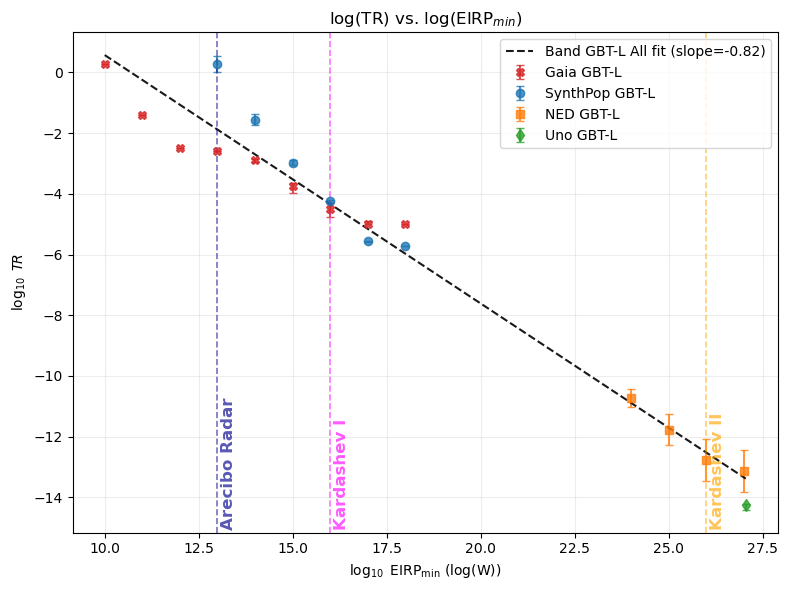

In [67]:
fig_tr = plot_logTR_vs_logEIRPmin(
    catalog_nested_dict = {'Gaia': {"GBT-L": gaia_shells_gbtl}, 'SynthPop': {"GBT-L": synthpop_shells_gbtl},
                           'NED': {"GBT-L": ned_shell_results_gbtl}, 'Uno': {"GBT-L": uno_summary_gbtl}},
    compare_mode='per_band_across_approaches',   # As we are analyzing all 4 approaches across GBT-L
    bands_to_compare=None,
    approaches_to_compare=None,
    overlay=True,
    colors=None,
    markers=None,
    show=True,
    return_slopes=False
)

## plot_density_colored_cmd_catalog_compare

Now let's plot 2 separate CMD's analyzing color and absolute magnitude from stars in Gaia and SynthPop GBT-L, using the viridis colormap for both plots:

In [71]:
gaia_stars_gbtl
synthpop_stars_gbtl

,field_name,pop,iMass,age,Fe/H_initial,Mass,In_Final_Phase,Dist,ra,dec,...,Gaia_BP_EDR3,Gaia_RP_EDR3,Dim_Compact_Object_Flag,Dist_pc,theta_arcmin,scaling_factor_percent,fmin,nu_rel,fwhm_arcmin,logEIRPmin
0,GJ860B,1.0,0.082673,14.000000,-2.096138,0.082673,0.0,1.980692,337.118925,57.681913,...,NaN,NaN,0.0,1980.692128,4.125536,51.232988,1.000000e-25,0.533333,8.4,15.962086
1,GJ860B,1.0,0.413374,14.000000,-1.845181,0.413353,0.0,2.699548,336.999725,57.720083,...,25.987790,22.391972,0.0,2699.548209,1.579340,90.663830,1.000000e-25,0.533333,8.4,15.983150
2,GJ860B,1.0,0.149169,14.000000,-2.191290,0.149166,0.0,4.396249,337.072631,57.670845,...,30.453184,26.192751,0.0,4396.249263,2.928749,71.387483,1.000000e-25,0.533333,8.4,16.510544
3,GJ860B,1.0,0.170885,14.000000,-1.196236,0.170881,0.0,4.511921,336.965673,57.676319,...,30.700015,26.237905,0.0,4511.920899,1.365004,92.940187,1.000000e-25,0.533333,8.4,16.418521
4,GJ860B,1.0,0.465188,14.000000,-1.322895,0.465158,0.0,4.649175,337.054967,57.671399,...,27.707595,23.707523,0.0,4649.175402,2.426451,79.346156,1.000000e-25,0.533333,8.4,16.513228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004337,HIP99711,10.0,1.158997,9.058798,-0.621264,0.520331,1.0,4.995745,303.507565,-0.822787,...,NaN,NaN,1.0,4995.744952,2.627909,76.234123,1.000000e-25,0.533333,8.4,16.593053
1004338,HIP99711,10.0,0.416821,7.540568,-0.558564,0.416812,0.0,5.035163,303.474094,-0.884893,...,24.829313,22.405685,0.0,5035.163137,1.888505,86.923619,1.000000e-25,0.533333,8.4,16.542891
1004339,HIP99711,10.0,0.613520,9.578914,-0.306460,0.613476,0.0,5.171779,303.514726,-0.889302,...,22.866310,20.836039,0.0,5171.779432,1.695855,89.314461,1.000000e-25,0.533333,8.4,16.554360
1004340,HIP99711,10.0,0.167888,7.154721,-0.582838,0.167886,0.0,5.314352,303.438788,-0.874278,...,27.339587,24.637287,0.0,5314.351994,3.653444,59.186106,1.000000e-25,0.533333,8.4,16.756683


In [73]:
fig_cmd = plot_density_colored_cmd_catalog_compare(
    catalog_dict = {'Gaia': {'GBT-L': gaia_stars_gbtl}, 'SynthPop': {'GBT-L': synthpop_stars_gbtl}},
    bands_to_compare=None,
    overlay=False,
    cmap_names={('Gaia', 'GBT-L'): 'viridis', ('SynthPop', 'GBT-L'): 'viridis'},
    point_size=8,
    xlim=None, ylim=None,
    show=True,
    title=None
)

# ADD in ALADIN/BEAM REPONSE PLOTS

In [1]:
from astroquery.gaia import Gaia
from astropy.coordinates import SkyCoord
import astropy.units as u
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from astropy.table import Table


votable_path = "356616_observations_288315_unique_280820.vot"
data_table = Table.read(votable_path, format="votable")
df = data_table.to_pandas()

In [12]:
df_small = df.loc[[0, 500, 5000, 50000, 100000, 200000, 300000], ["ra", "dec", "fwhm_arcmin", "r_est"]].copy()
df_small["fmin"] = 1e-26
df_small['nu_rel'] = 0.769
df_small['field name'] = [1, 2, 3, 4, 5, 6, 7]
df_small['receiving_band'] = ['GBT-L', 'GBT-L', 'GBT-S', 'GBT-L', 'GBT-S', 'GBT-L', 'GBT-S']
df_small

,ra,dec,fwhm_arcmin,r_est,fmin,nu_rel,field name,receiving_band
0,124.373564,-61.916283,6.4,5.220425,1.000000e-26,0.769,1,GBT-L
500,235.157257,-50.986211,6.4,3569.674987,1.000000e-26,0.769,2,GBT-L
5000,6.639102,-41.840455,6.4,1038.977856,1.000000e-26,0.769,3,GBT-S
50000,337.162703,18.968371,8.4,2186.465647,1.000000e-26,0.769,4,GBT-L
100000,104.347052,-24.647317,6.4,3370.492664,1.000000e-26,0.769,5,GBT-S
200000,264.242801,-44.312320,5.5,3672.485895,1.000000e-26,0.769,6,GBT-L
300000,296.382669,33.565181,5.5,2411.655322,1.000000e-26,0.769,7,GBT-S


In [5]:
from beamseti import process_gaia, process_synthpop, process_ned, process_uno
from beamseti.plotting import plot_logTR_vs_logEIRPmin, plot_density_colored_cmd_catalog_compare

In [8]:
process_gaia

<function beamseti.process_gaia.process_gaia(dataframe, limit_distance_pc=10000, output_prefix=None, batch_size=10, max_workers=5, sleep_between_batches=5, n_shells=8, log_eirp_shells=None, split_by_band=False)>

In [24]:

all_df_small, shell_results_small = process_gaia(
    dataframe=df_small,
    limit_distance_pc=10000,
    output_prefix=None,
    batch_size=10,
    max_workers=5,
    sleep_between_batches=5,
    n_shells=None,
    log_eirp_shells=np.linspace(11, 18, 8),
    split_by_band=True
)

/Users/MattLor/SETI/seti/process_gaia.py:155: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['1' '2' '3' '4' '5' '6' '7']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[:, 'field name'] = dataframe.loc[:, 'field name'].astype(str)


INFO: Query finished. [astroquery.utils.tap.core]


In [21]:
all_df_small['GBT-L']

,field_name,source_id,ra,dec,r_med_geo,r_lo_geo,r_hi_geo,r_med_photogeo,r_lo_photogeo,r_hi_photogeo,...,abs_g_geo,abs_g_photogeo,theta_arcmin,scaling_factor,fmin,nu_rel,fwhm_arcmin,logEIRPmin_med,logEIRPmin_lo,logEIRPmin_hi
0,1,5278042841418953344,124.333301,-61.931854,1401.098633,1162.740234,1771.924683,1386.849365,1261.125977,1536.818726,...,8.025297,8.047494,1.471604,0.863647,1.000000e-26,0.769,6.4,14.434602,14.272630,14.638555
1,1,5278042841418956288,124.341298,-61.928881,5395.420898,3694.257812,8688.776367,7072.452148,5771.931152,8514.394531,...,5.233121,4.645398,1.183915,0.909484,1.000000e-26,0.769,6.4,15.583259,15.254261,15.997123
2,1,5278042841419880960,124.340762,-61.939379,2961.592529,1623.224976,6258.465332,2320.810059,2080.988770,2590.199219,...,7.645852,8.175281,1.666766,0.828573,1.000000e-26,0.769,6.4,15.102720,14.580427,15.752607
3,1,5278042845716040448,124.337249,-61.933207,4402.789062,2160.935303,8551.477539,7009.084473,6032.820312,8406.298828,...,7.548494,6.538827,1.443184,0.868503,1.000000e-26,0.769,6.4,15.426685,14.808513,16.003311
4,1,5278042845716216832,124.328744,-61.932433,2345.566650,924.476074,5964.833984,2719.678223,2303.980957,3052.795410,...,8.965112,8.643763,1.593993,0.841989,1.000000e-26,0.769,6.4,14.893191,14.084487,15.703891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7970,7,2035008938581804288,296.435836,33.568661,1074.651245,1022.424072,1128.448364,1096.186523,1045.344238,1168.669556,...,6.687693,6.644608,2.666243,0.521228,1.000000e-26,0.769,5.5,14.423511,14.380237,14.465938
7971,7,2035008938581809664,296.426340,33.563956,3641.557861,3037.187012,4431.803223,3378.341797,2913.433105,3922.358643,...,4.173081,4.335999,2.184604,0.645696,1.000000e-26,0.769,5.5,15.390550,15.232915,15.561136
7972,7,2035008938581809792,296.425090,33.567814,1455.467896,1424.806641,1483.666870,1451.667480,1428.430176,1477.312378,...,1.413097,1.418775,2.126716,0.660636,1.000000e-26,0.769,5.5,14.584046,14.565552,14.600712
7973,7,2035008938581824128,296.430227,33.557797,1992.514648,1917.206421,2081.410889,1953.840332,1881.893555,2028.619263,...,3.487692,3.530254,2.418679,0.584974,1.000000e-26,0.769,5.5,14.909668,14.876202,14.947582


In [11]:
df_small["fmin"] = 1e-26
df_small['nu_rel'] = 0.769
df_small['field name'] = [1, 2, 3, 4, 5, 6, 7]
df_small['receiving_band'] = 'GBT-L'
df_small['dlim_Mpc'] = 969
df_small

,ra,dec,fwhm_arcmin,r_est,fmin,nu_rel,field name,receiving_band,dlim_Mpc
0,124.373564,-61.916283,6.4,5.220425,1.000000e-26,0.769,1,GBT-L,969
500,235.157257,-50.986211,6.4,3569.674987,1.000000e-26,0.769,2,GBT-L,969
5000,6.639102,-41.840455,6.4,1038.977856,1.000000e-26,0.769,3,GBT-L,969
50000,337.162703,18.968371,8.4,2186.465647,1.000000e-26,0.769,4,GBT-L,969
100000,104.347052,-24.647317,6.4,3370.492664,1.000000e-26,0.769,5,GBT-L,969
200000,264.242801,-44.312320,5.5,3672.485895,1.000000e-26,0.769,6,GBT-L,969
300000,296.382669,33.565181,5.5,2411.655322,1.000000e-26,0.769,7,GBT-L,969


In [12]:
uno_summary_df_small = process_uno(
    dataframe=df_small,
    log_rho_dict={'lower': 8.443, 'nominal': 8.473, 'upper': 8.653},
    log_rho_nominal=None, log_rho_pos_err=None, log_rho_neg_err=None,
    split_by_band=True,
    output_prefix=None,
    verbose=True
)

/Users/MattLor/SETI/seti/process_uno.py:131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['1' '2' '3' '4' '5' '6' '7']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[:, 'field name'] = dataframe.loc[:, 'field name'].astype(str)


Processing receiving_band=GBT-L with 7 fields.


In [13]:
uno_summary_df_small['GBT-L']

,area_deg2,dlim_Mpc,Vr_Mpc3,nu_rel,fmin,log_Mgal,log_Mgal_pos_err,log_Mgal_neg_err,N_stars,N_stars_upper,N_stars_lower,log_TR,log_TR_pos_err,log_TR_neg_err,log_EIRPmin,CWTFM,CWTFM_pos_err,CWTFM_neg_err
0,0.08689,969.0,8027.378259,0.769,1.000000e-26,12.377574,0.18,0.03,2.385469e+12,3.610553e+12,2.226249e+12,-12.2635,0.03,0.18,26.050649,3062.803948,219.04961,1039.229447


In [31]:
from beamseti.plotting import plot_density_colored_cmd_catalog_compare, plot_logTR_vs_logEIRPmin
plot_density_colored_cmd_catalog_compare

<function beamseti.plotting.plot_density_colored_cmd_catalog_compare(catalog_dict, bands_to_compare=None, overlay=True, cmap_names=None, point_size=8, xlim=None, ylim=None, show=True, title=None)>

In [37]:
plot_logTR_vs_logEIRPmin

<function beamseti.plotting.plot_logTR_vs_logEIRPmin(catalog_dict, compare_mode='per_band_across_approaches', bands_to_compare=None, approaches_to_compare=None, overlay=True, colors=None, markers=None, show=True, return_slopes=False)>